## `svydesign` in `finnsurveytext`

The new updated version of `finnsurveytext` works with `svydesign` objects which can be created with the `survey` package. There are two ways that `svydesign` objects can be used: 

1. As an input during the pre-processing of your data. 
2. As a way to add weights and additional columns within data exploration and comparison functions

#### First, let's read in `finnsurveytext` and then create a `svydesign` object for use in the package:

In [14]:
# install.packages("finnsurveytext")
# library(finnsurveytext)

# This will be removed once the new version of finnsurveytext is released. 
library(devtools)
load_all('/Users/adelineclarke/Documents/Uni Helsinki Work/2024/finnsurveytext_2024dev')

ℹ Loading finnsurveytext


In [7]:
# install.packages("survey") # uncomment if you don't have survey package
library(survey)

svy_d <- survey::svydesign(id = ~1, 
                           weights = ~paino, 
                           data = dev_coop)

Warning message:
“package ‘survey’ was built under R version 4.3.1”
Loading required package: grid

Loading required package: Matrix

Warning message:
“package ‘Matrix’ was built under R version 4.3.1”
Loading required package: survival


Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart




## Option 1: Formatting data using `svydesign` object

The relevant function here is `fst_prepare_svydesign()`. 

* svydesign: the name of the `svydesign` object
* question: the column of 'data' that contains the open-ended question
* id: the ID column in 'data'
* model: a Finnish language model available for `udpipe`, "ftb" or "tdt". For more info on these, see https://universaldependencies.org
    * if you do not provide a value, this will default to "ftb"
* stopword_list: a list of stopwords to remove from your 'data'. To find relevant stopwords lists, you can run `fst_find_stopwords()`
    * if you do not provide a value, this will default to "nltk"
    * "manual" can be used to indicate that a manual list will be provided.
* use_weights: optional, a boolean as to whether to include weights from the `svydesign`
    * if you do not provide a value, this will default to TRUE
* add_columns: any columns you want to add to the formatted data from the `svydesign` object, such as for use in comparison functions
    * if you do not provide any values, this will default to NULL
* manual: an optional boolean to indicate that a manual list will be provided, 'stopword_list = "manual"' can also or instead be used.
    * if you do not provide any values, this will default to FALSE
* manual_list: the manual list of stopwords if you choose to provide one. 
    * if you do not provide any values, this will default to an empty list. 
    
#### We will prepare our data below:

In [10]:
df <- fst_prepare_svydesign(svydesign = svy_d,
                  question = 'q11_3',
                  id = 'fsd_id',
                  model = 'tdt',
                  stopword_list = 'snowball',
                  use_weights = TRUE,
                  add_cols = c('gender', 'region')
                  )

## Option 2: Using `svydesign` object in data exploration

For this example, we will use `fst_dev_coop_2` which is formatted data that comes with `finnsurveytext` without any weights or additional columns. (It is in CoNLL-U format without additional columns.) 

In [12]:
head(fst_dev_coop_2)

,doc_id,paragraph_id,sentence_id,sentence,token_id,token,lemma,upos,xpos,feats,head_token_id,dep_rel,deps,misc
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1,1,"saastuminen ja luonnonvarojen liikakäyttö, nälänhätä ja ylikansoittuminen",1,saastuminen,saastuminen,NOUN,"N,Sg,Nom",Case=Nom|Number=Sing,0,root,NA,NA
2,1,1,1,"saastuminen ja luonnonvarojen liikakäyttö, nälänhätä ja ylikansoittuminen",3,luonnonvarojen,luonnonvaro,NOUN,"N,Pl,Gen",Case=Gen|Number=Plur,4,nmod,NA,NA
3,1,1,1,"saastuminen ja luonnonvarojen liikakäyttö, nälänhätä ja ylikansoittuminen",4,liikakäyttö,liikakäyttö,NOUN,"N,Sg,Nom",Case=Nom|Number=Sing,1,conj,NA,SpaceAfter=No
4,1,1,1,"saastuminen ja luonnonvarojen liikakäyttö, nälänhätä ja ylikansoittuminen",6,nälänhätä,nälänhätä,NOUN,"N,Sg,Nom",Case=Nom|Number=Sing,1,conj,NA,NA
5,1,1,1,"saastuminen ja luonnonvarojen liikakäyttö, nälänhätä ja ylikansoittuminen",8,ylikansoittuminen,ylikansoittuminen,NOUN,"N,Sg,Nom",Case=Nom|Number=Sing,1,conj,NA,SpacesAfter=\n
6,2,1,1,"ihmiskauppa, nälänhätä ja sodat/turvattomuus",1,ihmiskauppa,ihmiskauppa,NOUN,"N,Sg,Nom",Case=Nom|Number=Sing,0,root,NA,SpaceAfter=No


#### The relevant inputs are:

* use_svydesign_weights: should be set as TRUE if we want to use weights from within a `svydesign` object. 
* id: only required if weights are coming from a `svydesign` object 
* svydesign: the  `svydesign` object 

#### For example, let's get our weights for the wordcloud from our `svydesign` object "svy_d":

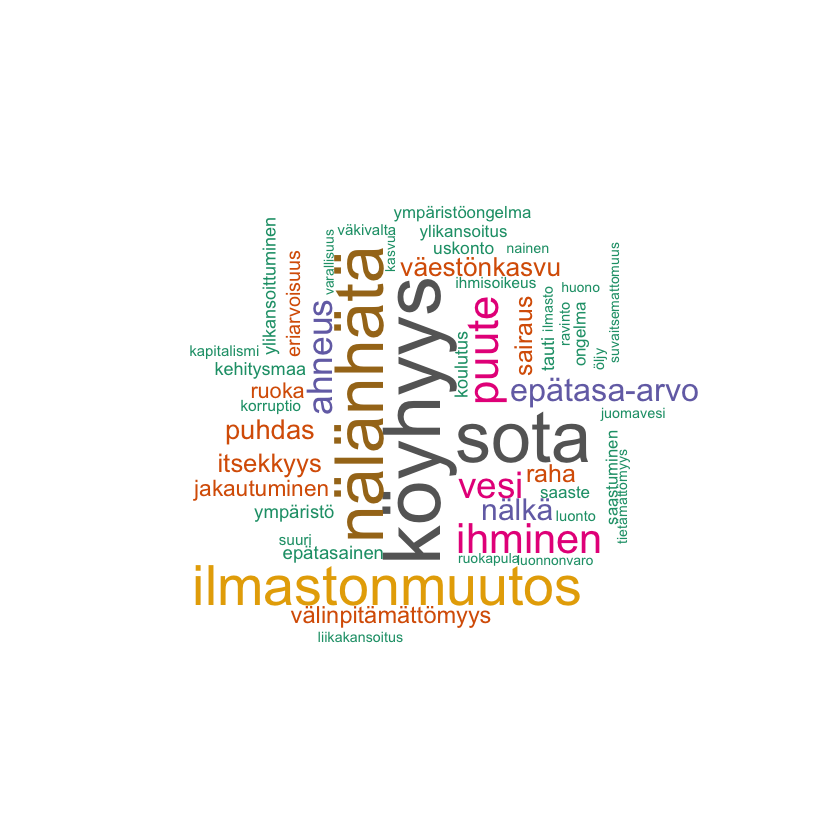

In [14]:
fst_wordcloud(fst_dev_coop_2, 
              pos_filter = c("NOUN", "VERB", "ADJ", "ADV"),
              max=50, 
              use_svydesign_weights = TRUE, 
              id = 'fsd_id', 
              svydesign = svy_d)

Note:
 Words with equal occurrence are presented in alphabetical order. 
 By default, words are presented in order to the `number` cutoff word. 
 This means that equally-occurring later-alphabetically words beyond the cutoff word will not be displayed.





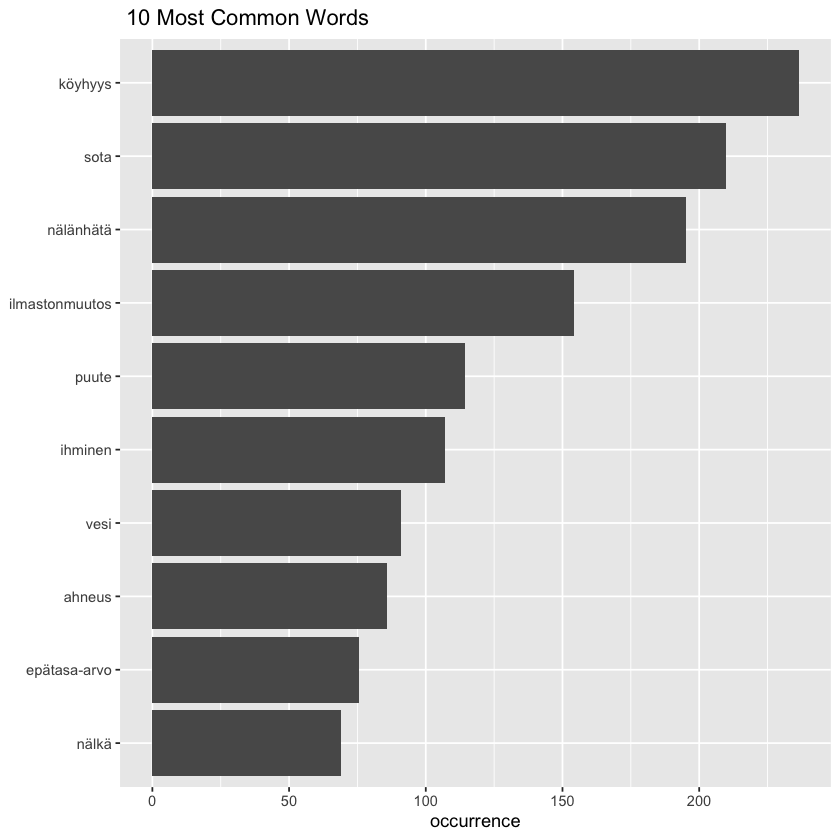

In [16]:
fst_freq(fst_dev_coop_2,
         number = 10,
         norm = NULL,
         pos_filter = NULL,
         strict = TRUE,
         name = NULL,
         use_svydesign_weights = TRUE,
         id = "fsd_id",
         svydesign = svy_d,
         use_column_weights = FALSE)

The Comparison Functions can use `svydesign` objects to provide the field used for splitting the data, and for weights where relevant. 

#### For example: 

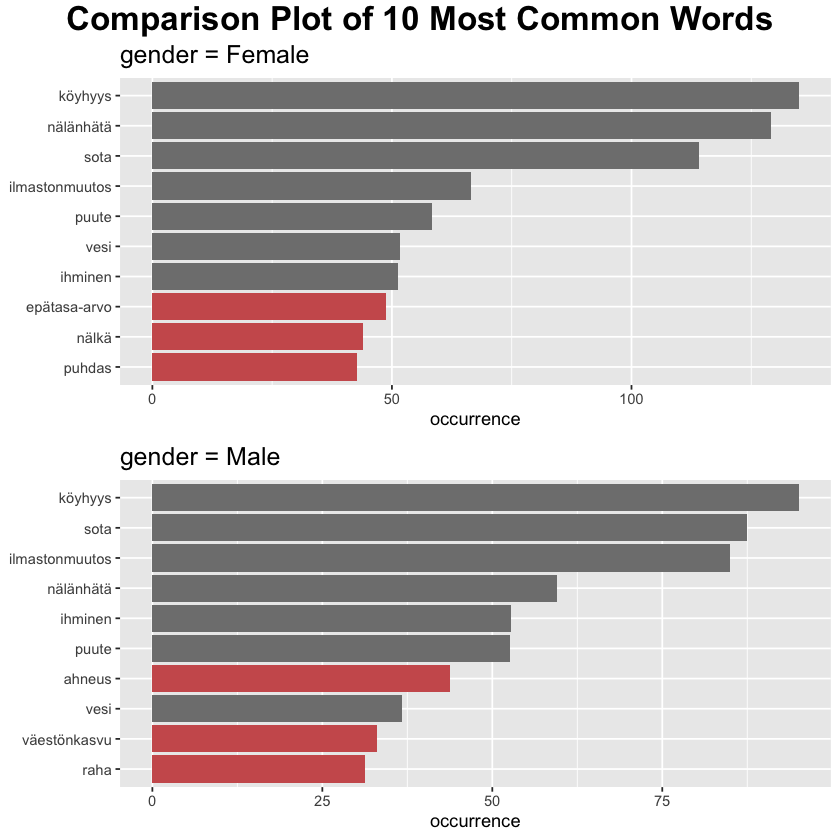

In [15]:
fst_ngrams_compare(fst_dev_coop_2,
                   field = 'gender',
                   number = 10,
                   ngrams = 1,
                   norm = NULL,
                   pos_filter = NULL,
                   strict = TRUE,
                   use_svydesign_weights = TRUE,
                   use_svydesign_field = TRUE,
                   id = "fsd_id",
                   svydesign = svy_d,
                   use_column_weights = FALSE,
                   exclude_nulls = TRUE,
                   rename_nulls = 'null_data',
                   unique_colour = "indianred",
                   title_size = 20,
                   subtitle_size = 15)

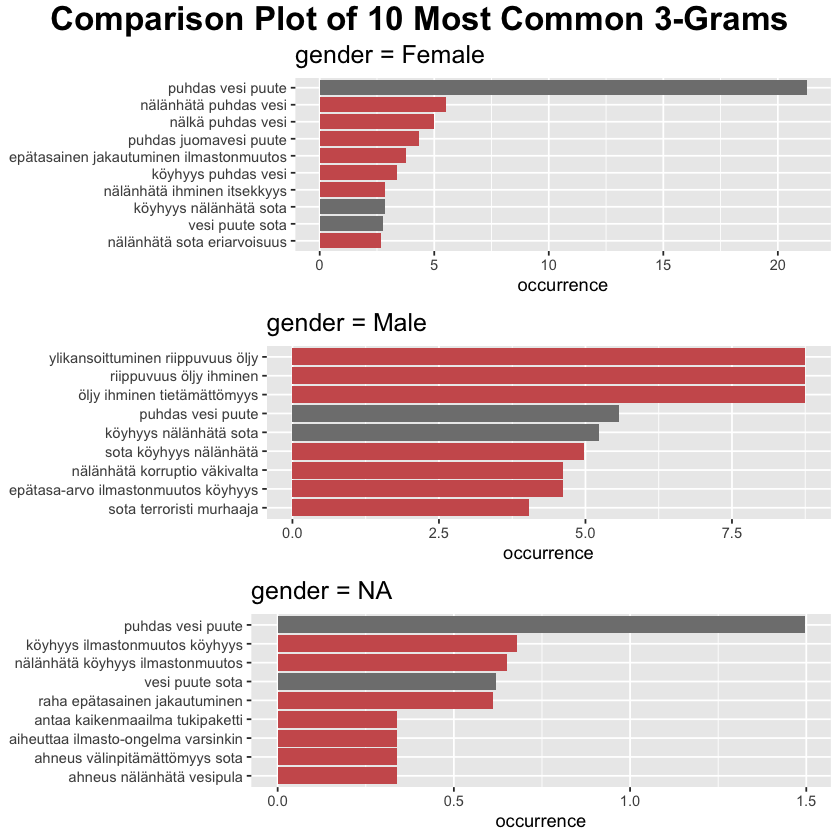

In [9]:
fst_ngrams_compare(fst_dev_coop_2,
                   'gender', 
                   number = 10, 
                   ngrams = 3, 
                   use_svydesign_weights = TRUE, 
                   use_svydesign_field = TRUE,  
                   id = 'fsd_id', 
                   svydesign = svy_d)

The single Concept Network functions do not have the option for weightings so they do not have the option to include `svydesign` object as input. 

However, the comparison Concept Networks can get the splitting field from a `svydesign` object. 

#### For example: 

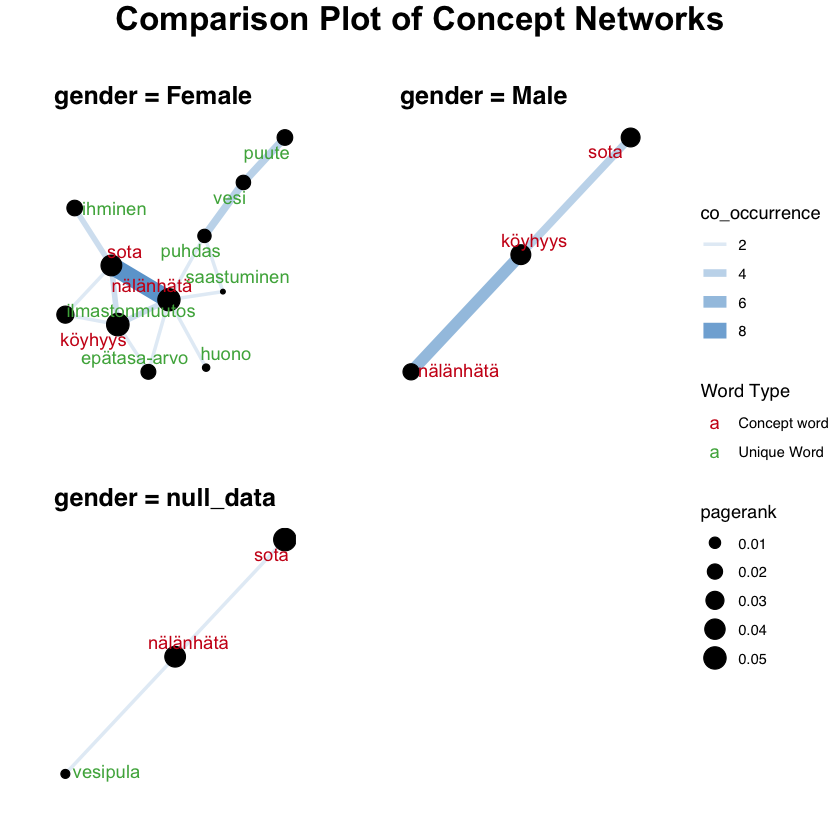

In [16]:
fst_concept_network_compare(data = fst_dev_coop_2,
                            concepts = 'köyhyys, nälänhätä, sota',
                            field = 'gender',
                            norm = NULL,
                            threshold = NULL,
                            pos_filter = NULL,
                            use_svydesign_field = TRUE,
                            id = "fsd_id",
                            svydesign = svy_d,
                            exclude_nulls = FALSE,
                            rename_nulls = 'null_data',
                            title_size = 20,
                            subtitle_size = 15)